# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [1]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
cov_0_dir = "0-cov.csv"
cov_5_dir = "5-cov.csv"
cov_0_data = np.loadtxt(cov_0_dir, delimiter=',')
cov_5_data = np.loadtxt(cov_5_dir, delimiter=',')
print(cov_0_data)
print(cov_0_data.shape)
print("----------------------------------------")
print(cov_5_data)
print(cov_5_data.shape)

[[-7.45264096e-14  6.92921407e-14  5.75335554e-14 ...  2.01092351e-14
   2.36194597e-14 -8.38431775e-15]
 [ 1.36947343e-14 -4.09681576e-14  5.36832118e-14 ...  1.56012905e-14
  -1.34993118e-13 -4.84806770e-15]
 [ 3.37326932e-14 -1.08973254e-15 -2.87413333e-14 ... -5.45730278e-15
   1.18754804e-13  5.03894506e-14]
 [ 6.08968914e-14  5.74268368e-14 -2.31710283e-14 ... -2.84925176e-13
  -1.37184415e-13 -2.24295503e-13]
 [ 9.11290304e-15  4.21096512e-14 -2.96167899e-14 ... -9.76053278e-14
   3.58316385e-14  3.70323843e-14]]
(5, 2591999)
----------------------------------------
[[-7.52055820e-14  6.82411419e-14  5.61391454e-14 ...  2.10127244e-14
   2.41325684e-14 -8.27168791e-15]
 [ 1.30155620e-14 -4.20191564e-14  5.22888018e-14 ...  1.65047799e-14
  -1.34480010e-13 -4.73543786e-15]
 [ 3.30535209e-14 -2.14073134e-15 -3.01357434e-14 ... -4.55381341e-15
   1.19267913e-13  5.05020805e-14]
 [ 6.02177190e-14  5.63758380e-14 -2.45654383e-14 ... -2.84021687e-13
  -1.36671306e-13 -2.24182873e-13]


In [2]:
# 2. Modify to get data with 3 clock covariance (1,3,5)
cov_3_data = np.stack((cov_5_data[0,:], cov_0_data[1,:], cov_5_data[2,:], cov_0_data[3,:], cov_5_data[4,:]), axis=0)
# np.savetxt("3-cov.csv", cov_3_data, delimiter=",")
print(cov_3_data)
print(cov_3_data.shape)

[[-7.52055820e-14  6.82411419e-14  5.61391454e-14 ...  2.10127244e-14
   2.41325684e-14 -8.27168791e-15]
 [ 1.36947343e-14 -4.09681576e-14  5.36832118e-14 ...  1.56012905e-14
  -1.34993118e-13 -4.84806770e-15]
 [ 3.30535209e-14 -2.14073134e-15 -3.01357434e-14 ... -4.55381341e-15
   1.19267913e-13  5.05020805e-14]
 [ 6.08968914e-14  5.74268368e-14 -2.31710283e-14 ... -2.84925176e-13
  -1.37184415e-13 -2.24295503e-13]
 [ 8.43373071e-15  4.10586524e-14 -3.10111999e-14 ... -9.67018384e-14
   3.63447472e-14  3.71450141e-14]]
(5, 2591999)


### 2. 绘制allan方差曲线

In [3]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.80542548e-14 6.22359851e-14 4.39877540e-14 3.11262377e-14
 2.20155016e-14 1.55078284e-14 1.10456571e-14 7.85458899e-15
 5.51390680e-15 3.93479368e-15 2.76558273e-15 1.97893614e-15
 1.52543902e-15 1.29020446e-15 1.45015090e-15 1.91005592e-15
 2.68053849e-15 3.23352225e-15 4.02134349e-15 4.79969095e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.80487086e-14 6.22575574e-14 4.39884670e-14 3.10533430e-14
 2.19408504e-14 1.54929841e-14 1.09774920e-14 7.75578018e-15
 5.47051854

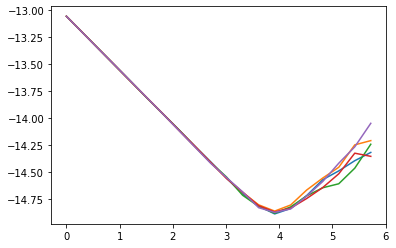

In [4]:
# calculate allan variance for 0 covariance
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(cov_0_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_0_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))

### 3. 计算Gamma

#### (1) For each 2 clocks calculate 

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [5]:
def rolling_diff(arr, tau = 1):
    # tau should be the power of 2
    # arr is a one-dimension array
    if tau >= len(arr):
        raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
    else:
        result = list()
        for i in range(len(arr)):
            if i + tau >= len(arr):
                break
            else:
                result.append(arr[i + tau] - arr[i])
        return np.array(result)

In [9]:
def cal_cij_and_plot(cov_data, taus):
    C_ij_all = list()
    for tau in taus:
        delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
        print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
        result = list()
        for i in range(delta_clocks.shape[0]):
            for j in range(delta_clocks.shape[0]):
                if i < j:
                    C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
                    result.append(C_ij)
        C_ij_all.append(result)
    
    C_ij_all = np.array(C_ij_all)
    print(C_ij_all)
    print(C_ij_all.shape)
    
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                C_ij = C_ij_all[:,i+j-1]
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus), Gamma_ij)
            else:
                continue

In [7]:
taus = 2 ** np.arange(0,20)

tau is 1 and delta_clocks has shape (5, 2591998)
tau is 2 and delta_clocks has shape (5, 2591997)
tau is 4 and delta_clocks has shape (5, 2591995)
tau is 8 and delta_clocks has shape (5, 2591991)
tau is 16 and delta_clocks has shape (5, 2591983)
tau is 32 and delta_clocks has shape (5, 2591967)
tau is 64 and delta_clocks has shape (5, 2591935)
tau is 128 and delta_clocks has shape (5, 2591871)
tau is 256 and delta_clocks has shape (5, 2591743)
tau is 512 and delta_clocks has shape (5, 2591487)
tau is 1024 and delta_clocks has shape (5, 2590975)
tau is 2048 and delta_clocks has shape (5, 2589951)
tau is 4096 and delta_clocks has shape (5, 2587903)
tau is 8192 and delta_clocks has shape (5, 2583807)
tau is 16384 and delta_clocks has shape (5, 2575615)
tau is 32768 and delta_clocks has shape (5, 2559231)
tau is 65536 and delta_clocks has shape (5, 2526463)
tau is 131072 and delta_clocks has shape (5, 2460927)
tau is 262144 and delta_clocks has shape (5, 2329855)
tau is 524288 and delta_cl

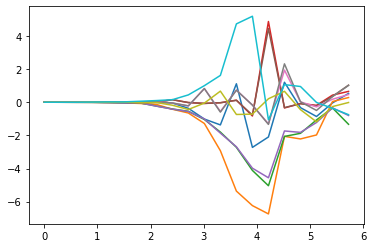

In [10]:
cal_cij_and_plot(cov_0_data, taus)

tau is 1 and delta_clocks has shape (5, 2591998)
tau is 2 and delta_clocks has shape (5, 2591997)
tau is 4 and delta_clocks has shape (5, 2591995)
tau is 8 and delta_clocks has shape (5, 2591991)
tau is 16 and delta_clocks has shape (5, 2591983)
tau is 32 and delta_clocks has shape (5, 2591967)
tau is 64 and delta_clocks has shape (5, 2591935)
tau is 128 and delta_clocks has shape (5, 2591871)
tau is 256 and delta_clocks has shape (5, 2591743)
tau is 512 and delta_clocks has shape (5, 2591487)
tau is 1024 and delta_clocks has shape (5, 2590975)
tau is 2048 and delta_clocks has shape (5, 2589951)
tau is 4096 and delta_clocks has shape (5, 2587903)
tau is 8192 and delta_clocks has shape (5, 2583807)
tau is 16384 and delta_clocks has shape (5, 2575615)
tau is 32768 and delta_clocks has shape (5, 2559231)
tau is 65536 and delta_clocks has shape (5, 2526463)
tau is 131072 and delta_clocks has shape (5, 2460927)
tau is 262144 and delta_clocks has shape (5, 2329855)
tau is 524288 and delta_cl

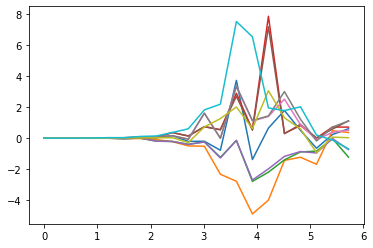

In [11]:
cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [12]:
def cal_cij_and_plot2(cov_data):
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
                assert taus_i.shape == taus_j.shape == taus_ij.shape
            
                C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
            
                print('tau - %s' % taus_ij)
                print('C_ij - %s' % C_ij)
                print('multiply_adev_ij - %s' % multiply_adev_ij)
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus_ij), Gamma_ij)
            else:
                continue

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [-1.62602983e-30  1.10469299e-29  1.82894179e-30 -6.55164830e-30
  8.24290241e-31 -8.82702746e-31 -4.74726681e-31 -1.87755733e-31
  7.71927083e-31  1.12635467e-30 -1.46745241e-33  1.34592078e-31
 -1.02026866e-31  3.89246255e-32  1.90206782e-31  7.97884899e-31
  1.52706604e-30 -4.60997528e-31 -3.83344775e-30 -3.86323924e-29]
multiply_adev_ij - [1.55061268e-26 7.74932083e-27 3.86990772e-27 1.93314747e-27
 9.66077654e-28 4.80525078e-28 2.42507225e-28 1.21836931e-28
 6.03278588e-29 3.03023413e-29 1.53053630e-29 8.08834585e-30
 4.78000678e-30 3.53629708e-30 4.52842117e-30 8.21258654e-30
 1.48790303e-29 2.25890468e-29 4.53645655e-29 5.92880653e-29]
Gamma_ij - [-1.04863700e-04  1.42553523e-03  4.72606048e-04 -3.38910941e-0

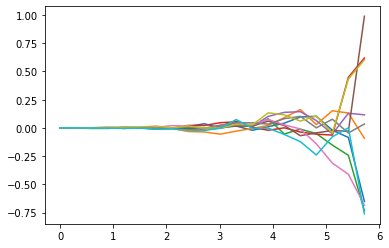

In [13]:
cal_cij_and_plot2(cov_0_data)

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [-1.54111411e-30  1.13833586e-29  3.10751094e-30 -2.38849942e-30
  7.57295892e-30 -6.11317254e-31  3.72812634e-32 -1.58839471e-31
  8.22527065e-31  1.12833769e-30 -3.82659958e-33  1.33834690e-31
 -1.01908780e-31  3.89879466e-32  1.90725566e-31  7.98090137e-31
  1.52759666e-30 -4.60851901e-31 -3.83343395e-30 -3.86325304e-29]
multiply_adev_ij - [1.55062118e-26 7.74965726e-27 3.87118629e-27 1.93731099e-27
 9.72828140e-28 4.80796523e-28 2.43020359e-28 1.21865945e-28
 6.03783719e-29 3.03043468e-29 1.53030047e-29 8.08760745e-30
 4.78012638e-30 3.53638302e-30 4.52897171e-30 8.21277031e-30
 1.48795323e-29 2.25891578e-29 4.53642381e-29 5.92879806e-29]
Gamma_ij - [-9.93868866e-05  1.46888543e-03  8.02728339e-04 -1.23289417e-0

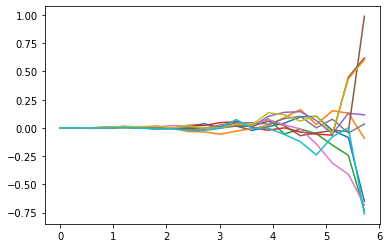

In [14]:
cal_cij_and_plot2(cov_5_data)

#### (3) For each 2 clocks calculate

In [ ]:
# TODO

### 4. 带入模型进行测试

In [15]:
y_t = cov_0_data.T
clock_size = y_t.shape[1]

In [18]:
regularization = True
subset_size_list = [3, 1]

window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [4.38709250e-14 3.23386615e-14 2.01301889e-14 9.65233289e-15
 1.28901351e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [8.51586849e-15 6.32386878e-15 3.61680978e-15 2.14974957e-15
 3.01977068e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [3.99384365e-14 2.90790157e-14 1.97635711e-14 1.37586098e-14
 1.35667630e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [7.53642614e-14 3.45006444e-14 3.19300047e-14 2.71093416e-14
 2.40946759e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [9.91274647e-14 6.27273746e-14 2.93207084e-14 4.30581545e-14
 2.99525327e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [7.91132345e-14 5.50338800e-14 3.53660489e-14 1.54043972e-14
 2.23001185e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.04326885e-13 6.55160913e-14 4.07041466e-14 2.37926990e-14
 1.98096063e-14]
taus - [

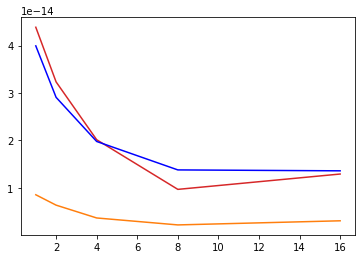

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [3.84322593e-14 2.39475469e-14 1.60490862e-14 1.57716145e-14
 1.17202801e-14 9.25709950e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [7.54749968e-15 4.72083961e-15 3.09650971e-15 2.97774552e-15
 2.17655723e-15 1.40182317e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [3.71916429e-14 2.71557063e-14 2.49209723e-14 1.88151466e-14
 1.11416502e-14 1.18348198e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [6.96064346e-14 4.70263678e-14 3.58120037e-14 2.23318428e-14
 3.20967482e-14 2.08029246e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.04673709e-13 7.13048202e-14 4.10266227e-14 3.56218015e-14
 2.22218959e-14 2.73131863e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [7.68859171e-14 5.01761881e-14 3.99462647e-14 3.34632073e-14
 1.39637912e-14 1.19695615e-14

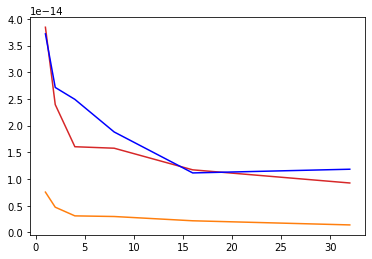

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [4.23039124e-14 2.78852403e-14 1.86309662e-14 1.54946158e-14
 1.02594278e-14 8.91543025e-15 2.48238621e-15 1.40302514e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.00831793e-15 5.33026521e-15 3.46880397e-15 2.92214367e-15
 1.92869365e-15 1.71180814e-15 5.69014139e-16 4.42769813e-16]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [4.16950144e-14 2.83238316e-14 1.97991535e-14 1.21837428e-14
 1.06768333e-14 7.78082736e-15 5.33129408e-15 4.94268802e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.94965103e-14 6.46467714e-14 4.48538675e-14 2.91443272e-14
 2.08073460e-14 1.96627704e-14 1.02131334e-14 7.96320566e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.27316595e-14 6.52525179

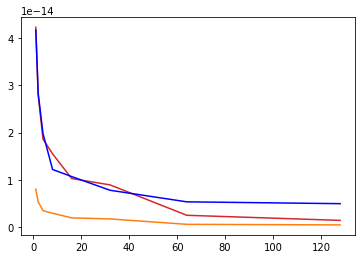

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [4.17055799e-14 2.86742070e-14 2.15387929e-14 1.32002483e-14
 8.81785865e-15 6.68324381e-15 3.22441759e-15 3.28745464e-15
 2.01886487e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [7.87345228e-15 5.38653658e-15 4.13614458e-15 2.44981342e-15
 1.65199766e-15 1.35988510e-15 7.35383070e-16 7.65692937e-16
 5.39102113e-16]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [4.02335628e-14 2.89753163e-14 1.82356002e-14 1.37153495e-14
 1.10368552e-14 7.14398019e-15 5.39864024e-15 4.07668802e-15
 2.47300604e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [8.69634070e-14 6.26950273e-14 4.54456949e-14 2.79994446e-14
 2.29520889e-14 1.20710791e-14 9.06515571e-15 4.31353642e-15
 1.64452584e-15]
t

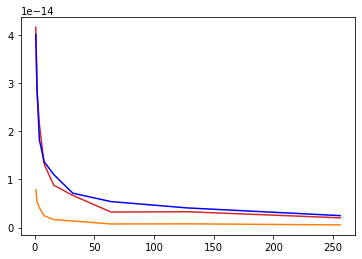

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [4.14663442e-14 2.83468561e-14 2.01318145e-14 1.41184709e-14
 9.45155400e-15 6.61280909e-15 5.19000900e-15 2.74784946e-15
 1.70528972e-15 1.23823293e-15 1.46900442e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [7.90593484e-15 5.38979318e-15 3.89858445e-15 2.67581089e-15
 1.77494961e-15 1.24803135e-15 9.81241661e-16 5.95596809e-16
 3.94450291e-16 2.09555631e-16 2.13891797e-16]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [3.97479899e-14 2.83620600e-14 2.04071072e-14 1.34281838e-14
 1.00153291e-14 6.55340377e-15 5.99350340e-15 4.23466236e-15


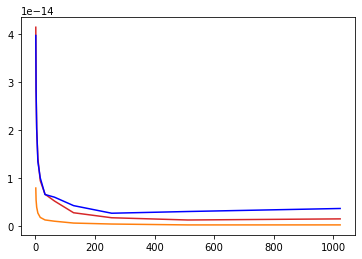

6000 600


In [ ]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((clock_size - subset_size + 1, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_raw_sum_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(y_t.shape[1] - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size,j:j+subset_size]
        
                # 5. Calculate summation within a subset 
                subset_raw_sum = np.sum(subset_raw, axis=1)
                subset_raw_sum_list.append(subset_raw_sum)
#                print("*** Raw sum ***")
#                print(subset_raw_sum) 

            # 6. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.cov(np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1)
            allset_corr_mean = np.corrcoef(np.asarray(subset_raw_sum_list))
#            print("*** Cov mean ***")
#            print(allset_cov_mean)
#            print("*** Corr ***")
#            print(allset_corr_mean)
    
            # 7. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(clock_size - subset_size + 1)
#                print("*** Regularization term ***")
#                print(sigma * np.eye(clock_size - subset_size + 1))
    
            # 8. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#            print("*** Inverse Cov mean ***")
#            print(allset_cov_mean_inverse)
    
            # 9. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#            print("*** Weight ***")
#            print(weight)

            # 10. Calculate beamformer weighted clock
            Z = (np.dot(weight.T, np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1))[0]
#            print("*** Weighted output ***")
#            print(Z)
    
            # 11. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 12. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 13. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 14. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 15. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(taus, adevs, color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(taus, adevs, color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')